# Rental Price Analysis — Exploratory Data Analysis

## 1. Data Overview

This notebook explores the structure, completeness, and basic characteristics of a rental listings dataset from Switzerland.  
The goal of this section is to understand what data is available, assess data quality, and define the scope for further analysis.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)

# Load dataset
df = pd.read_csv("../data/raw/listings.csv")

df.shape

(1000, 51)

The dataset contains **1,000 listings** with **51 columns**, representing a mix of:
- numerical attributes (e.g. rent, size, coordinates),
- categorical attributes (e.g. city, region),
- and many sparse boolean-style features.

Before modeling, it is necessary to evaluate data completeness and identify which variables are usable.



In [2]:
df.head()

,ID,type,address,city,postcode,lat,lon,rentNet,rentGross,currency,livingSpace,arePetsAllowed,hasFlatSharingCommunity,isUnderRoof,CHF/m2,title,categories,numberOfRooms,floor,yearBuilt,isNewBuilding,yearLastRenovated,hasGarage,hasParking,hasRamp,isWheelchairAccessible,isOldBuilding,hasSwimmingPool,hasFireplace,isCornerHouse,isMiddleHouse,hasGardenShed,hasLiftingPlatform,hasBalcony,hasCableTv,isGroundFloorRaised,hasNiceView,hasConnectedBuildingLand,hasElevator,isChildFriendly,distanceHighSchool,distanceKindergarten,distancePrimarySchool,distanceMotorway,distancePublicTransport,balcony,builtInKitchen,garden,offerType,personId,region
0,4000906965,"['HOUSE', 'SINGLE_HOUSE']",Alterstrasse 4,Filzbach,8757,47.12,9.13,1920.00,1980.00,CHF,82.00,NaN,NaN,NaN,24.15,3-Zimmer Einfamilienhaus inkl. Garage ? NEUBAU,"['HOUSE', 'SINGLE_HOUSE']",3.00,NaN,2024.00,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RENT,2268787,schweiz
1,4000997183,"['APARTMENT', 'STUDIO']",Hauptstr. 30 (Nord),Döttingen,5312,47.57,8.26,750.00,915.00,CHF,45.00,True,NaN,NaN,20.33,Zentrale Studio-Wohnung!,"['APARTMENT', 'STUDIO']",1.00,-1.00,2009.00,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,True,800.00,700.00,700.00,NaN,170.00,NaN,NaN,NaN,RENT,679,schweiz
2,4001099145,"['APARTMENT', 'FLAT']",Falmenstrasse 2d,Uster,8610,47.35,8.72,1970.00,2270.00,CHF,88.00,True,NaN,NaN,25.80,Schöne Wohnung an sehr zentraler Lage,"['APARTMENT', 'FLAT']",3.50,2.00,2012.00,True,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RENT,679,schweiz
3,4001028409,"['APARTMENT', 'DUPLEX']",Am Mattenhof 2b,Kriens,6010,47.03,8.30,2150.00,2490.00,CHF,117.00,True,NaN,NaN,21.28,Wohnen im MATTEO - Moderne Maisonette-Wohnung ...,"['APARTMENT', 'DUPLEX']",3.50,4.00,2018.00,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RENT,679,schweiz
4,4000888461,['APARTMENT'],Dorfstrasse 31,Benzenschwil,5636,47.25,8.37,2015.00,2300.00,CHF,94.00,False,False,NaN,24.47,ERSTVERMIETUNG: Lebensqualität für die ganze F...,['APARTMENT'],4.50,NaN,2024.00,True,NaN,True,False,NaN,False,NaN,False,False,NaN,NaN,NaN,NaN,True,True,True,True,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RENT,1743533,schweiz


To understand the dataset structure in more detail, we inspect column data types and non-null counts.
This helps identify:
- missing values,
- potential type conversions,
- and columns that may be unsuitable for analysis due to sparsity.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1000 non-null   int64  
 1   type                      1000 non-null   object 
 2   address                   884 non-null    object 
 3   city                      1000 non-null   object 
 4   postcode                  1000 non-null   int64  
 5   lat                       1000 non-null   float64
 6   lon                       1000 non-null   float64
 7   rentNet                   834 non-null    float64
 8   rentGross                 989 non-null    float64
 9   currency                  994 non-null    object 
 10  livingSpace               818 non-null    float64
 11  arePetsAllowed            544 non-null    object 
 12  hasFlatSharingCommunity   158 non-null    object 
 13  isUnderRoof               147 non-null    object 
 14  CHF/m2   

Key observations from the dataset structure:

- The target variable `rentGross` is nearly complete (989 non-null values).
- Core numerical features such as `numberOfRooms`, `livingSpace`, and `floor` are reasonably populated.
- Many amenity-related columns (e.g. `hasRamp`, `hasGardenShed`) are extremely sparse.
- Several columns are identifiers or descriptive text (`ID`, `address`, `title`) and are not suitable for modeling.

Based on this, only a subset of well-populated and interpretable features will be used in subsequent analysis.

In [4]:
missing_summary = (
    df.isna()
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

missing_summary.columns = ["column", "missing_fraction"]

missing_summary.head(30)

,column,missing_fraction
0,balcony,1.00
1,builtInKitchen,1.00
2,garden,1.00
3,distanceMotorway,0.97
4,hasGardenShed,0.88
5,hasLiftingPlatform,0.88
6,isMiddleHouse,0.87
7,hasConnectedBuildingLand,0.87
8,hasRamp,0.86
9,isCornerHouse,0.86


A significant portion of the columns suffer from extreme missingness.
Columns with more than ~70–80% missing values will be excluded from analysis, as they provide limited reliable signal.

This explicit filtering step reduces noise, simplifies modeling, and improves interpretability.


In [5]:
df["rentGross"].describe()


count     989.00
mean     2150.08
std      1011.31
min       115.00
25%      1530.00
50%      1920.00
75%      2500.00
max     10500.00
Name: rentGross, dtype: float64

`rentGross` (monthly gross rent in CHF) is selected as the prediction target because:
- it has high data coverage,
- it reflects the actual cost faced by renters,
- and it is the most business-relevant outcome variable.

Rows with missing `rentGross` values will be removed in later preprocessing steps.


## 2. Target Variable Analysis

In this section, we explore the distribution of the target variable `rentGross` and examine how rental prices vary across cities.
Understanding the target behavior is critical before feature engineering and modeling.


In [6]:
# Keep only rows with a valid target
df_target = df.dropna(subset=["rentGross"]).copy()

df_target.shape

(989, 51)

Rows with missing `rentGross` values are removed at this stage.
This ensures that all subsequent analysis and modeling steps operate on a consistent and valid target variable.


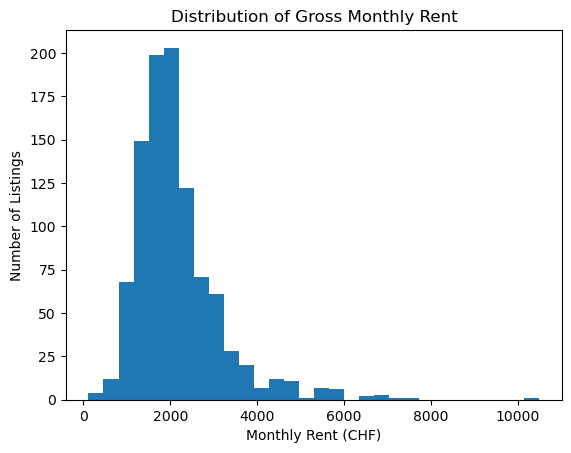

In [7]:
plt.figure()
plt.hist(df_target["rentGross"], bins=30)
plt.xlabel("Monthly Rent (CHF)")
plt.ylabel("Number of Listings")
plt.title("Distribution of Gross Monthly Rent")
plt.show()

The distribution of `rentGross` is right-skewed, with most listings concentrated in lower price ranges and a smaller number of high-rent outliers.
This pattern is typical for housing markets and suggests that error metrics sensitive to large deviations (e.g. RMSE) should be interpreted carefully.


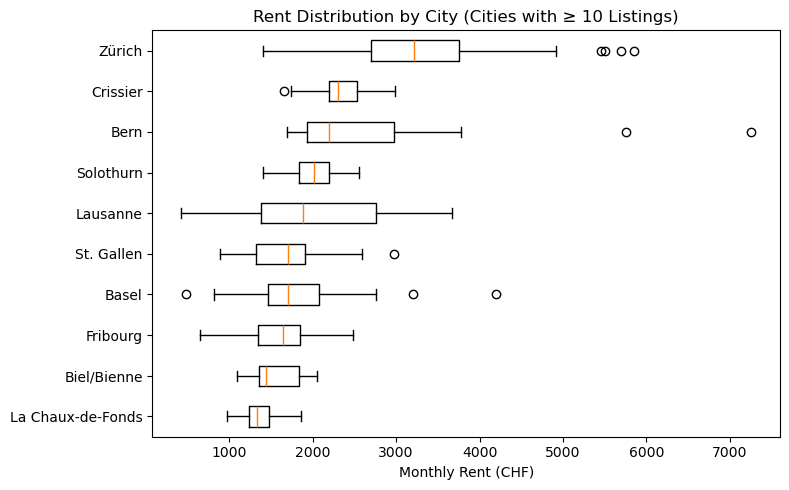

In [17]:
# Keep only cities with enough observations
min_listings = 10
valid_cities = (
    df_target["city"]
    .value_counts()
    .loc[lambda x: x >= min_listings]
    .index
)

df_city_filtered = df_target[df_target["city"].isin(valid_cities)]

# Order cities by median rent
city_order = (
    df_city_filtered.groupby("city")["rentGross"]
    .median()
    .sort_values()
    .index
)

plt.figure(figsize=(8, 5))
plt.boxplot(
    [df_city_filtered[df_city_filtered["city"] == c]["rentGross"] for c in city_order],
    tick_labels=city_order,
    vert=False
)
plt.xlabel("Monthly Rent (CHF)")
plt.title("Rent Distribution by City (Cities with ≥ 10 Listings)")
plt.tight_layout()
plt.show()


Rental prices differ substantially across cities.
Some cities exhibit both higher median rents and greater variability, indicating that location is likely a dominant driver of rental price variation.

This observation motivates treating city (and regional information) as a key feature in subsequent models.


In [ ]:
city_summary = (
    df_target.groupby("city")["rentGross"]
    .agg(["count", "mean", "median", "std"])
    .sort_values("median", ascending=False)
)

city_summary

,count,mean,median,std
city,,,,
Féchy,1,7390.00,7390.00,NaN
Coppet,1,7000.00,7000.00,NaN
Troinex,1,5900.00,5900.00,NaN
Veyrier,1,5800.00,5800.00,NaN
Jussy,2,5600.00,5600.00,0.00
...,...,...,...,...
Rorbas,2,875.00,875.00,1025.30
Neckertal,1,850.00,850.00,NaN
Studen BE,1,830.00,830.00,NaN


Key takeaways from target analysis:

- Gross rent values are right-skewed, with a minority of high-priced listings.
- Median rent varies significantly across cities.
- Location-based features are expected to explain a large portion of price variance.

These findings inform both feature selection and model choice in later stages.
